In [31]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [35]:
import tensorflow

In [38]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential,Input,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU

In [40]:
dirname = os.path.join(os.getcwd(), 'CarneDataset', 'train')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath, topdown=True):
    
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            img_rgb = plt.imread(filepath)
            images.append(img_rgb)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
                       
    if cant>0:
        print(root, cant)
        directories.append(root)
        dircount.append(cant)
        cant=0

print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\Gaby\Downloads\practicaCarnes\CarneDataset\train\
C:\Users\Gaby\Downloads\practicaCarnes\CarneDataset\train\CLASS_02 62
C:\Users\Gaby\Downloads\practicaCarnes\CarneDataset\train\CLASS_03 213
C:\Users\Gaby\Downloads\practicaCarnes\CarneDataset\train\CLASS_04 105
C:\Users\Gaby\Downloads\practicaCarnes\CarneDataset\train\CLASS_05 949
C:\Users\Gaby\Downloads\practicaCarnes\CarneDataset\train\CLASS_06 37
C:\Users\Gaby\Downloads\practicaCarnes\CarneDataset\train\CLASS_07 204
C:\Users\Gaby\Downloads\practicaCarnes\CarneDataset\train\CLASS_08 63
Directorios leidos: 7
Imagenes en cada directorio [62, 213, 105, 949, 37, 204, 63]
suma Total de imagenes en subdirs: 1633


In [41]:
#crear etiquetas
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  1633


In [42]:
carne=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    carne.append(name[len(name)-1])
    indice=indice+1

0 CLASS_02
1 CLASS_03
2 CLASS_04
3 CLASS_05
4 CLASS_06
5 CLASS_07
6 CLASS_08


In [43]:
y = np.array(labels)
X = np.array(images)
# Encuentra los numeros de etiquetas de entrenamiento
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [44]:
#set entrenamiento y testeo
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (1306, 216, 384, 3) (1306,)
Testing data shape :  (327, 216, 384, 3) (327,)


Text(0.5, 1.0, 'Ground Truth : 3')

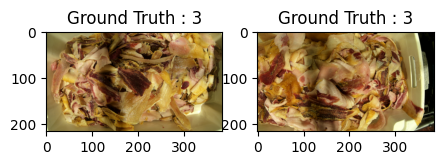

In [45]:
plt.figure(figsize=[5,5])

#Primera imagen de entrenamiento
plt.subplot(1,2,1)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

#Primera imagen de testing
plt.subplot(1,2,2)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [46]:
#procesamiento de imagen 
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [47]:
#Hacer el one-hot encoding para la red
# Cambiar las etiquetas de codificación categórica a codificación de un solo uso
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Mostrar el cambio para la etiqueta de categoría mediante la codificación de un solo elemento activo
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0. 0. 0.]


In [68]:
#Set de entrenamiento y validación
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


ValueError: Found input variables with inconsistent numbers of samples: [1044, 1306]

In [66]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(1044, 216, 384, 3) (262, 216, 384, 3) (1044, 7) (262, 7)


In [50]:
#Crear el modelo de CNN
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [51]:
carne_model = Sequential()
carne_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(216,384,3)))
carne_model.add(LeakyReLU(alpha=0.1))
carne_model.add(MaxPooling2D((2, 2),padding='same'))
carne_model.add(Dropout(0.5))

carne_model.add(Flatten())
carne_model.add(Dense(32, activation='linear'))
carne_model.add(LeakyReLU(alpha=0.1))
carne_model.add(Dropout(0.5))
carne_model.add(Dense(nClasses, activation='softmax'))

In [52]:
carne_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 216, 384, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 216, 384, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 108, 192, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 108, 192, 32)      0         
                                                                 
 flatten (Flatten)           (None, 663552)            0         
                                                                 
 dense (Dense)               (None, 32)                21233696  
                                                        

In [54]:
lr_schedule = tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
carne_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(learning_rate=lr_schedule),metrics=['accuracy'])

In [55]:
#entrenamos el modelo: aprende a clasificar imágenes
carne_train = carne_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/6
17/17 [==============================] - 32s 2s/step - loss: 10.8541 - accuracy: 0.2682 - val_loss: 1.9726 - val_accuracy: 0.6183
Epoch 2/6
17/17 [==============================] - 24s 1s/step - loss: 2.8924 - accuracy: 0.3391 - val_loss: 1.7736 - val_accuracy: 0.6183
Epoch 3/6
17/17 [==============================] - 23s 1s/step - loss: 2.1372 - accuracy: 0.4243 - val_loss: 1.7842 - val_accuracy: 0.0802
Epoch 4/6
17/17 [==============================] - 23s 1s/step - loss: 2.2331 - accuracy: 0.4148 - val_loss: 1.3368 - val_accuracy: 0.6183
Epoch 5/6
17/17 [==============================] - 22s 1s/step - loss: 1.7006 - accuracy: 0.4521 - val_loss: 1.3143 - val_accuracy: 0.6183
Epoch 6/6
17/17 [==============================] - 22s 1s/step - loss: 2.5671 - accuracy: 0.4033 - val_loss: 1.3416 - val_accuracy: 0.6183


In [56]:
#guardar la red para reutilizarla, sin tener que volver a entrenarla
carne_model.save("carne_mnist.h5py")

INFO:tensorflow:Assets written to: carne_mnist.h5py\assets


INFO:tensorflow:Assets written to: carne_mnist.h5py\assets


In [58]:
#Evaluar la red
test_eval = carne_model.evaluate(test_X, test_Y_one_hot, verbose=1)

11/11 [==============================] - 2s 154ms/step - loss: 1.4694 - accuracy: 0.5810


In [59]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.4693963527679443
Test accuracy: 0.5810397267341614


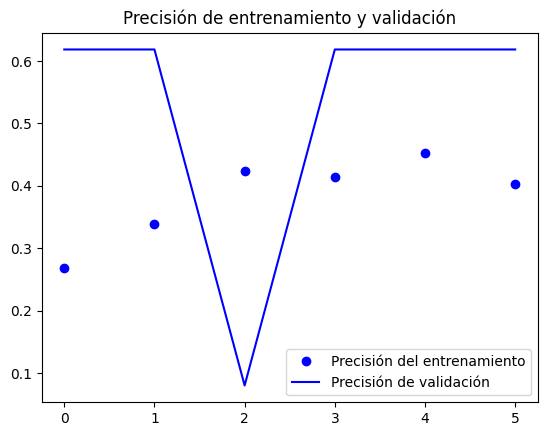

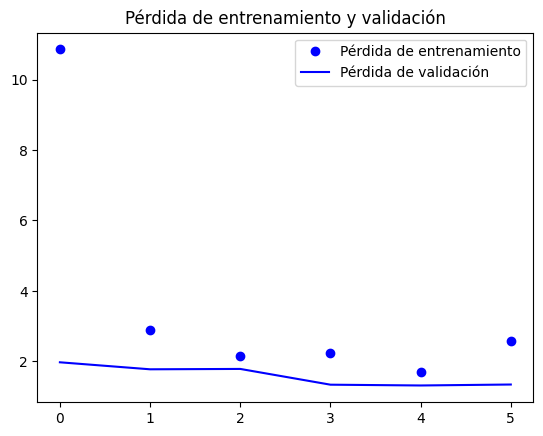

In [60]:
accuracy = carne_train.history['accuracy']
val_accuracy = carne_train.history['val_accuracy']
loss = carne_train.history['loss']
val_loss = carne_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Precisión del entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Precisión de validación')
plt.title('Precisión de entrenamiento y validación')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Pérdida de entrenamiento y validación')
plt.legend()
plt.show()

In [61]:
predicted_classes2 = carne_model.predict(test_X)

11/11 [==============================] - 2s 144ms/step


In [62]:
predicted_classes=[]
for predicted_carne in predicted_classes2:
    predicted_classes.append(predicted_carne.tolist().index(max(predicted_carne)))
predicted_classes=np.array(predicted_classes)